In [206]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

In [207]:
#데이터 불러오기
train = pd.read_csv("C:/Users/KU_BD_3/김동우데이터 모음/train.csv")
test = pd.read_csv("C:/Users/KU_BD_3/김동우데이터 모음/test.csv")
train_1 = pd.read_csv("C:/Users/KU_BD_3/김동우데이터 모음/train.csv")
sample_submission = pd.read_csv("C:/Users/KU_BD_3/김동우데이터 모음/sample_submission.csv")

In [208]:
pd.concat([train,test],axis = 0)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,F,Y,Y,0,202500.0,Working,Incomplete higher,Married,House / apartment,-18593,-5434,1,1,1,0,Accountants,2.0,-19.0,NaN
9996,36453,M,Y,Y,0,202500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-10886,-1315,1,1,0,0,Laborers,2.0,-34.0,NaN
9997,36454,F,N,Y,0,292500.0,Working,Secondary / secondary special,Married,House / apartment,-21016,-14018,1,0,0,0,Medicine staff,2.0,-55.0,NaN
9998,36455,F,Y,N,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-16541,-1085,1,0,1,0,NaN,2.0,-33.0,NaN


In [209]:
data = pd.concat([train,test],axis = 0)

In [210]:
data.isnull()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True


In [211]:
data.isnull().sum()

index                0
gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
occyp_type       11323
family_size          0
begin_month          0
credit           10000
dtype: int64

In [212]:
data = data.drop("occyp_type",axis = 1)

In [213]:
data.isnull().sum()

index                0
gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
family_size          0
begin_month          0
credit           10000
dtype: int64

In [214]:
len(data['gender'].unique())

2

In [215]:
unique_len = data.apply(lambda x: len(x.unique()))

In [216]:
unique_len

index            36457
gender               2
car                  2
reality              2
child_num            9
income_total       265
income_type          5
edu_type             5
family_type          5
house_type           6
DAYS_BIRTH        7183
DAYS_EMPLOYED     3640
FLAG_MOBIL           1
work_phone           2
phone                2
email                2
family_size         10
begin_month         61
credit               4
dtype: int64

-1.2개 이하\
-2.2개 초과 10개 이하\
-3.10개 초과

In [217]:
group1 = unique_len[unique_len <=2].index
group1

Index(['gender', 'car', 'reality', 'FLAG_MOBIL', 'work_phone', 'phone',
       'email'],
      dtype='object')

In [218]:
group2 = unique_len[(unique_len > 2)&(unique_len <= 10)].index
group2

Index(['child_num', 'income_type', 'edu_type', 'family_type', 'house_type',
       'family_size', 'credit'],
      dtype='object')

In [219]:
group3 = unique_len[(unique_len > 10)].index
group3

Index(['index', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month'], dtype='object')

# data group1 (이진 변수)데이터 가공

In [220]:
data['gender'].unique()

array(['F', 'M'], dtype=object)

In [221]:
data['gender'] = data['gender'].replace(['F','M'],[0,1])

data['car'] = data['car'].replace(['N','Y'],[0,1])

data['reality'] = data['reality'].replace(['N','Y'],[0,1])


In [222]:
data[group1]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,0,0,0,1,0,0,0
1,0,0,1,1,0,0,1
2,1,1,1,1,0,1,0
3,0,0,1,1,0,1,0
4,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...
9995,0,1,1,1,1,1,0
9996,1,1,1,1,1,0,0
9997,0,0,1,1,0,0,0
9998,0,1,0,1,0,1,0


# data group2 데이터 가공

<AxesSubplot:>

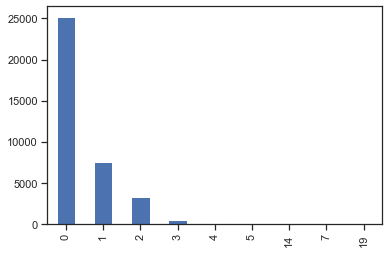

In [238]:
data['child_num'].value_counts().plot.bar()

In [239]:
data.loc[data['child_num']>2,'child_num'] = 2 

<AxesSubplot:>

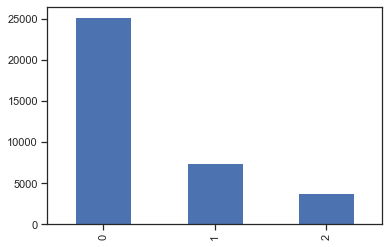

In [240]:
data['child_num'].value_counts().plot.bar()

# 카테고리형 변수 처리

In [241]:
data[group2]

,child_num,income_type,edu_type,family_type,house_type,family_size,credit
0,0,Commercial associate,Higher education,Married,Municipal apartment,2.0,1.0
1,1,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,3.0,1.0
2,0,Working,Higher education,Married,House / apartment,2.0,2.0
3,0,Commercial associate,Secondary / secondary special,Married,House / apartment,2.0,0.0
4,0,State servant,Higher education,Married,House / apartment,2.0,2.0
...,...,...,...,...,...,...,...
9995,0,Working,Incomplete higher,Married,House / apartment,2.0,NaN
9996,0,Working,Secondary / secondary special,Civil marriage,House / apartment,2.0,NaN
9997,0,Working,Secondary / secondary special,Married,House / apartment,2.0,NaN
9998,0,Commercial associate,Secondary / secondary special,Married,House / apartment,2.0,NaN


In [242]:
data[group2].apply(lambda x :len(x.unique()))

child_num       3
income_type     5
edu_type        5
family_type     5
house_type      6
family_size    10
credit          4
dtype: int64

In [243]:
from sklearn import preprocessing

In [244]:
label_encoder = preprocessing.LabelEncoder()

In [245]:
data['income_type'].unique()

array(['Commercial associate', 'Working', 'State servant', 'Pensioner',
       'Student'], dtype=object)

In [246]:
label_encoder.fit_transform(data['income_type'])

array([0, 0, 4, ..., 4, 0, 4])

### 원핫인코딩

In [247]:
la = label_encoder.fit_transform(data['income_type'])

In [248]:
from sklearn.preprocessing import OneHotEncoder

In [249]:
la = la.reshape(-1,1)

In [250]:
oh_encoder = OneHotEncoder()
oh_encoder.fit(la)
oh_labels = oh_encoder.transform(la)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]
원-핫 인코딩 데이터 차원
(36457, 5)


In [254]:
data = pd.get_dummies(data)
data
#바로 원핫인코딩 시켜주는 코드

,index,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,...,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents
0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,1,0,0,1,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,2,1,1,1,0,1,2,0,1,0,...,1,0,0,0,0,1,0,0,0,0
3,3,0,0,1,0,0,3,0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,4,0,1,1,0,0,3,0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,0,2,0,1,1,...,1,0,0,0,0,1,0,0,0,0
9996,36453,1,1,1,0,0,5,0,1,1,...,0,0,0,0,0,1,0,0,0,0
9997,36454,0,0,1,0,1,8,0,1,0,...,1,0,0,0,0,1,0,0,0,0
9998,36455,0,1,0,0,0,4,0,1,0,...,1,0,0,0,0,1,0,0,0,0


### 여기는 원핫 인코딩 전이랑 연결되는 일반 라벨링 시키기

In [27]:
set(label_encoder.fit_transform(data['income_type']))

{0, 1, 2, 3, 4}

In [28]:
data['income_type'] = label_encoder.fit_transform(data['income_type'])
data['edu_type'] = label_encoder.fit_transform(data['edu_type'])
data['family_type'] = label_encoder.fit_transform(data['family_type'])
data['house_type'] = label_encoder.fit_transform(data['house_type'])

In [29]:
data[group2]

,child_num,income_type,edu_type,family_type,house_type,family_size,credit
0,0,0,1,1,2,2.0,1.0
1,1,0,4,0,1,3.0,1.0
2,0,4,1,1,1,2.0,2.0
3,0,0,4,1,1,2.0,0.0
4,0,2,1,1,1,2.0,2.0
...,...,...,...,...,...,...,...
9995,0,4,2,1,1,2.0,NaN
9996,0,4,4,0,1,2.0,NaN
9997,0,4,4,1,1,2.0,NaN
9998,0,0,4,1,1,2.0,NaN


# 연속형변수 구간화

In [223]:
data[group3]

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,0,202500.0,-13899,-4709,-6.0
1,1,247500.0,-11380,-1540,-5.0
2,2,450000.0,-19087,-4434,-22.0
3,3,202500.0,-15088,-2092,-37.0
4,4,157500.0,-15037,-2105,-26.0
...,...,...,...,...,...
9995,36452,202500.0,-18593,-5434,-19.0
9996,36453,202500.0,-10886,-1315,-34.0
9997,36454,292500.0,-21016,-14018,-55.0
9998,36455,180000.0,-16541,-1085,-33.0


In [224]:
data['income_total'].min()

27000.0

In [225]:
data['income_total'].max()

1575000.0

In [226]:
len(data['income_total'].unique())

265

In [227]:
counts, bin_dividers = np.histogram(data['income_total'],bins = 7)

In [228]:
data['income_total']

0       202500.0
1       247500.0
2       450000.0
3       202500.0
4       157500.0
          ...   
9995    202500.0
9996    202500.0
9997    292500.0
9998    180000.0
9999    270000.0
Name: income_total, Length: 36457, dtype: float64

### 연속형 변수를 그룹화

In [229]:
pd.cut(data['income_total'], bins = bin_dividers, include_lowest = True)

0        (26999.999, 248142.857]
1        (26999.999, 248142.857]
2       (248142.857, 469285.714]
3        (26999.999, 248142.857]
4        (26999.999, 248142.857]
                  ...           
9995     (26999.999, 248142.857]
9996     (26999.999, 248142.857]
9997    (248142.857, 469285.714]
9998     (26999.999, 248142.857]
9999    (248142.857, 469285.714]
Name: income_total, Length: 36457, dtype: category
Categories (7, interval[float64]): [(26999.999, 248142.857] < (248142.857, 469285.714] < (469285.714, 690428.571] < (690428.571, 911571.429] < (911571.429, 1132714.286] < (1132714.286, 1353857.143] < (1353857.143, 1575000.0]]

In [230]:
pd.cut(data['income_total'], bins = bin_dividers, include_lowest = True,labels = [i for i in range(7)])

0       0
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: income_total, Length: 36457, dtype: category
Categories (7, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6]

In [231]:
data['income_total'] = pd.factorize(pd.cut(data['income_total'], bins = bin_dividers, include_lowest = True,labels = [i for i in range(7)]))[0]

In [232]:
data[group3]

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,0,0,-13899,-4709,-6.0
1,1,0,-11380,-1540,-5.0
2,2,1,-19087,-4434,-22.0
3,3,0,-15088,-2092,-37.0
4,4,0,-15037,-2105,-26.0
...,...,...,...,...,...
9995,36452,0,-18593,-5434,-19.0
9996,36453,0,-10886,-1315,-34.0
9997,36454,1,-21016,-14018,-55.0
9998,36455,0,-16541,-1085,-33.0


In [233]:
def make_bin(array,n):
    array = -array
    _, bin_dividers = np.histogram(array,bins = n)
    cut_categories = pd.cut(array, bins = bin_dividers, include_lowest = True,labels = [i for i in range(n)])
    bined_array = pd.factorize(cut_categories)[0]
    return bined_array

In [234]:
pd.Series(make_bin(data['DAYS_BIRTH'],10)).value_counts()
#그룹화한 데이터 개수 찾기

0    5177
3    5015
1    4922
5    4248
4    4063
2    3934
8    3713
6    3252
9    1252
7     881
dtype: int64

In [235]:
data['DAYS_BIRTH'] = make_bin(data['DAYS_BIRTH'],10)
data['DAYS_EMPLOYED'] = make_bin(data['DAYS_EMPLOYED'],6)
data['begin_month'] = make_bin(data['begin_month'],4)

In [236]:
data[group3]

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,0,0,0,0,0
1,1,0,1,0,0
2,2,1,2,0,1
3,3,0,3,0,2
4,4,0,3,0,1
...,...,...,...,...,...
9995,36452,0,2,0,1
9996,36453,0,5,0,2
9997,36454,1,8,0,3
9998,36455,0,4,0,2


In [255]:
data

,index,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,...,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents
0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,1,0,0,1,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,2,1,1,1,0,1,2,0,1,0,...,1,0,0,0,0,1,0,0,0,0
3,3,0,0,1,0,0,3,0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,4,0,1,1,0,0,3,0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,0,2,0,1,1,...,1,0,0,0,0,1,0,0,0,0
9996,36453,1,1,1,0,0,5,0,1,1,...,0,0,0,0,0,1,0,0,0,0
9997,36454,0,0,1,0,1,8,0,1,0,...,1,0,0,0,0,1,0,0,0,0
9998,36455,0,1,0,0,0,4,0,1,0,...,1,0,0,0,0,1,0,0,0,0


# 모델 돌려보기

In [257]:
train.shape

(26457, 20)

In [258]:
test.shape

(10000, 19)

In [259]:
data[:-10000]

,index,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,...,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents
0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,1,0,0,1,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,2,1,1,1,0,1,2,0,1,0,...,1,0,0,0,0,1,0,0,0,0
3,3,0,0,1,0,0,3,0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,4,0,1,1,0,0,3,0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
26453,26453,0,0,1,1,0,3,0,1,0,...,0,1,0,0,0,1,0,0,0,0
26454,26454,0,1,0,0,1,5,0,1,0,...,0,0,0,0,0,0,0,0,0,1
26455,26455,1,0,1,0,0,5,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [261]:
data['credit']

0       1.0
1       1.0
2       2.0
3       0.0
4       2.0
       ... 
9995    NaN
9996    NaN
9997    NaN
9998    NaN
9999    NaN
Name: credit, Length: 36457, dtype: float64

In [262]:
train = data[:-10000]
test = data[-10000:]

In [263]:
train_x = train.drop("credit",axis = 1)

In [264]:
train_y = train['credit']
test_x = test.drop("credit",axis = 1)

In [265]:
from sklearn.ensemble import RandomForestClassifier

In [266]:
clf = RandomForestClassifier()

In [267]:
clf.fit(train_x,train_y)

RandomForestClassifier()

In [268]:
train_proba = clf.predict_proba(train_x)

In [269]:
train_proba

array([[0.05, 0.71, 0.24],
       [0.12, 0.63, 0.25],
       [0.04, 0.04, 0.92],
       ...,
       [0.03, 0.08, 0.89],
       [0.02, 0.1 , 0.88],
       [0.01, 0.08, 0.91]])

In [270]:
np.argmax(train_proba,axis = 1)[:10]

array([1, 1, 2, 0, 2, 1, 2, 0, 2, 2], dtype=int64)

In [271]:
clf.predict_proba(test_x)

array([[0.04, 0.16, 0.8 ],
       [0.13, 0.31, 0.56],
       [0.1 , 0.22, 0.68],
       ...,
       [0.05, 0.18, 0.77],
       [0.06, 0.48, 0.46],
       [0.11, 0.37, 0.52]])

In [272]:
sample_submission.iloc[:,1:] = clf.predict_proba(test_x)

In [273]:
sample_submission

,index,0,1,2
0,26457,0.04,0.16,0.80
1,26458,0.13,0.31,0.56
2,26459,0.10,0.22,0.68
3,26460,0.09,0.28,0.63
4,26461,0.06,0.42,0.52
...,...,...,...,...
9995,36452,0.13,0.41,0.46
9996,36453,0.09,0.32,0.59
9997,36454,0.05,0.18,0.77
9998,36455,0.06,0.48,0.46


In [274]:
sample_submission.to_csv("sample_submission_randomforest_var2.csv",index = False)

# Catbbost Classifier

In [275]:
from catboost import CatBoostClassifier

In [276]:
CatBoostClassifier = CatBoostClassifier()

In [277]:
CatBoostClassifier.fit(train_x,train_y)

Learning rate set to 0.093513
0:	learn: 1.0555790	total: 17.6ms	remaining: 17.6s
1:	learn: 1.0216142	total: 21.8ms	remaining: 10.9s
2:	learn: 0.9942478	total: 26.9ms	remaining: 8.93s
3:	learn: 0.9718442	total: 32.4ms	remaining: 8.07s
4:	learn: 0.9536749	total: 37.3ms	remaining: 7.41s
5:	learn: 0.9387099	total: 40.4ms	remaining: 6.69s
6:	learn: 0.9260262	total: 46.4ms	remaining: 6.59s
7:	learn: 0.9157045	total: 51.9ms	remaining: 6.43s
8:	learn: 0.9070586	total: 57.2ms	remaining: 6.29s
9:	learn: 0.8997825	total: 61.2ms	remaining: 6.06s
10:	learn: 0.8933756	total: 65.8ms	remaining: 5.92s
11:	learn: 0.8883293	total: 70.8ms	remaining: 5.83s
12:	learn: 0.8840900	total: 74.9ms	remaining: 5.68s
13:	learn: 0.8801619	total: 91ms	remaining: 6.41s
14:	learn: 0.8769498	total: 95ms	remaining: 6.24s
15:	learn: 0.8741237	total: 99.1ms	remaining: 6.09s
16:	learn: 0.8718426	total: 103ms	remaining: 5.95s
17:	learn: 0.8698987	total: 107ms	remaining: 5.86s
18:	learn: 0.8680026	total: 112ms	remaining: 5.78s

191:	learn: 0.8109813	total: 865ms	remaining: 3.64s
192:	learn: 0.8108249	total: 869ms	remaining: 3.63s
193:	learn: 0.8105689	total: 874ms	remaining: 3.63s
194:	learn: 0.8103012	total: 879ms	remaining: 3.63s
195:	learn: 0.8101503	total: 883ms	remaining: 3.62s
196:	learn: 0.8100180	total: 888ms	remaining: 3.62s
197:	learn: 0.8098296	total: 892ms	remaining: 3.61s
198:	learn: 0.8095724	total: 895ms	remaining: 3.6s
199:	learn: 0.8092683	total: 899ms	remaining: 3.6s
200:	learn: 0.8090106	total: 903ms	remaining: 3.59s
201:	learn: 0.8088179	total: 907ms	remaining: 3.58s
202:	learn: 0.8085180	total: 911ms	remaining: 3.58s
203:	learn: 0.8083296	total: 916ms	remaining: 3.57s
204:	learn: 0.8081754	total: 919ms	remaining: 3.56s
205:	learn: 0.8079897	total: 924ms	remaining: 3.56s
206:	learn: 0.8078085	total: 927ms	remaining: 3.55s
207:	learn: 0.8075613	total: 932ms	remaining: 3.55s
208:	learn: 0.8073453	total: 937ms	remaining: 3.55s
209:	learn: 0.8071656	total: 941ms	remaining: 3.54s
210:	learn: 0.

350:	learn: 0.7798296	total: 1.56s	remaining: 2.9s
351:	learn: 0.7797100	total: 1.57s	remaining: 2.89s
352:	learn: 0.7795747	total: 1.57s	remaining: 2.89s
353:	learn: 0.7794370	total: 1.58s	remaining: 2.88s
354:	learn: 0.7792830	total: 1.58s	remaining: 2.88s
355:	learn: 0.7791136	total: 1.59s	remaining: 2.87s
356:	learn: 0.7789159	total: 1.59s	remaining: 2.87s
357:	learn: 0.7786711	total: 1.6s	remaining: 2.87s
358:	learn: 0.7784319	total: 1.6s	remaining: 2.86s
359:	learn: 0.7783262	total: 1.61s	remaining: 2.86s
360:	learn: 0.7781249	total: 1.61s	remaining: 2.85s
361:	learn: 0.7778593	total: 1.61s	remaining: 2.85s
362:	learn: 0.7777658	total: 1.62s	remaining: 2.84s
363:	learn: 0.7776753	total: 1.62s	remaining: 2.84s
364:	learn: 0.7774881	total: 1.63s	remaining: 2.83s
365:	learn: 0.7773125	total: 1.63s	remaining: 2.83s
366:	learn: 0.7771422	total: 1.64s	remaining: 2.82s
367:	learn: 0.7769598	total: 1.64s	remaining: 2.82s
368:	learn: 0.7768131	total: 1.64s	remaining: 2.81s
369:	learn: 0.7

511:	learn: 0.7554128	total: 2.26s	remaining: 2.16s
512:	learn: 0.7552491	total: 2.27s	remaining: 2.15s
513:	learn: 0.7551264	total: 2.27s	remaining: 2.15s
514:	learn: 0.7549901	total: 2.28s	remaining: 2.14s
515:	learn: 0.7549387	total: 2.28s	remaining: 2.14s
516:	learn: 0.7548321	total: 2.29s	remaining: 2.14s
517:	learn: 0.7546233	total: 2.29s	remaining: 2.13s
518:	learn: 0.7544557	total: 2.3s	remaining: 2.13s
519:	learn: 0.7542481	total: 2.3s	remaining: 2.12s
520:	learn: 0.7541393	total: 2.31s	remaining: 2.12s
521:	learn: 0.7540392	total: 2.31s	remaining: 2.12s
522:	learn: 0.7539641	total: 2.32s	remaining: 2.11s
523:	learn: 0.7538332	total: 2.32s	remaining: 2.11s
524:	learn: 0.7536257	total: 2.32s	remaining: 2.1s
525:	learn: 0.7534680	total: 2.33s	remaining: 2.1s
526:	learn: 0.7533269	total: 2.33s	remaining: 2.09s
527:	learn: 0.7531828	total: 2.34s	remaining: 2.09s
528:	learn: 0.7529342	total: 2.34s	remaining: 2.09s
529:	learn: 0.7528393	total: 2.35s	remaining: 2.08s
530:	learn: 0.75

692:	learn: 0.7329925	total: 3.14s	remaining: 1.39s
693:	learn: 0.7328770	total: 3.15s	remaining: 1.39s
694:	learn: 0.7327733	total: 3.15s	remaining: 1.38s
695:	learn: 0.7326629	total: 3.15s	remaining: 1.38s
696:	learn: 0.7325620	total: 3.16s	remaining: 1.37s
697:	learn: 0.7324592	total: 3.16s	remaining: 1.37s
698:	learn: 0.7322952	total: 3.17s	remaining: 1.36s
699:	learn: 0.7322117	total: 3.17s	remaining: 1.36s
700:	learn: 0.7320813	total: 3.18s	remaining: 1.35s
701:	learn: 0.7319533	total: 3.18s	remaining: 1.35s
702:	learn: 0.7318137	total: 3.19s	remaining: 1.35s
703:	learn: 0.7316817	total: 3.19s	remaining: 1.34s
704:	learn: 0.7316398	total: 3.19s	remaining: 1.34s
705:	learn: 0.7315639	total: 3.2s	remaining: 1.33s
706:	learn: 0.7313829	total: 3.2s	remaining: 1.33s
707:	learn: 0.7313130	total: 3.21s	remaining: 1.32s
708:	learn: 0.7312289	total: 3.21s	remaining: 1.32s
709:	learn: 0.7311137	total: 3.22s	remaining: 1.31s
710:	learn: 0.7310156	total: 3.22s	remaining: 1.31s
711:	learn: 0.

851:	learn: 0.7153869	total: 3.84s	remaining: 668ms
852:	learn: 0.7152613	total: 3.85s	remaining: 663ms
853:	learn: 0.7151167	total: 3.85s	remaining: 659ms
854:	learn: 0.7149773	total: 3.86s	remaining: 654ms
855:	learn: 0.7148787	total: 3.86s	remaining: 650ms
856:	learn: 0.7148127	total: 3.87s	remaining: 645ms
857:	learn: 0.7146800	total: 3.87s	remaining: 641ms
858:	learn: 0.7145769	total: 3.88s	remaining: 636ms
859:	learn: 0.7144928	total: 3.88s	remaining: 632ms
860:	learn: 0.7143523	total: 3.88s	remaining: 627ms
861:	learn: 0.7142639	total: 3.89s	remaining: 622ms
862:	learn: 0.7141872	total: 3.89s	remaining: 618ms
863:	learn: 0.7140807	total: 3.9s	remaining: 613ms
864:	learn: 0.7139801	total: 3.9s	remaining: 609ms
865:	learn: 0.7139234	total: 3.9s	remaining: 604ms
866:	learn: 0.7138103	total: 3.91s	remaining: 600ms
867:	learn: 0.7136856	total: 3.91s	remaining: 595ms
868:	learn: 0.7136143	total: 3.92s	remaining: 590ms
869:	learn: 0.7134621	total: 3.92s	remaining: 586ms
870:	learn: 0.7

In [278]:
CatBoostClassifier.predict_proba(test_x)

array([[0.02008876, 0.05507731, 0.92483393],
       [0.0817382 , 0.07593853, 0.84232327],
       [0.05081691, 0.11219515, 0.83698794],
       ...,
       [0.03605564, 0.10771824, 0.85622612],
       [0.06169071, 0.30227135, 0.63603794],
       [0.02605128, 0.1254641 , 0.84848462]])

In [279]:
sample_submission.iloc[:,1:] = CatBoostClassifier.predict_proba(test_x)

In [280]:
sample_submission

,index,0,1,2
0,26457,0.020089,0.055077,0.924834
1,26458,0.081738,0.075939,0.842323
2,26459,0.050817,0.112195,0.836988
3,26460,0.088255,0.104935,0.806810
4,26461,0.018352,0.166745,0.814903
...,...,...,...,...
9995,36452,0.076247,0.277098,0.646655
9996,36453,0.019574,0.167850,0.812576
9997,36454,0.036056,0.107718,0.856226
9998,36455,0.061691,0.302271,0.636038


In [282]:
sample_submission.to_csv("sample_submission_catboost_ver2.csv",index = False)

# xgboost

In [283]:
from xgboost import plot_importance
from xgboost import XGBClassifier

In [284]:
xg = XGBClassifier()

In [285]:
xg.fit(train_x,train_y)

c:\users\ku_bd_3\anaconda3\envs\bigdata\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:25:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [286]:
xg.predict_proba(test_x)

array([[0.0047901 , 0.13264285, 0.86256707],
       [0.03706026, 0.09461292, 0.86832684],
       [0.00906531, 0.16480157, 0.82613313],
       ...,
       [0.00669504, 0.07748745, 0.9158175 ],
       [0.04278092, 0.16591372, 0.7913053 ],
       [0.01366851, 0.14051116, 0.84582037]], dtype=float32)

In [287]:
sample_submission.iloc[:,1:] = xg.predict_proba(test_x)

In [288]:
sample_submission.to_csv("sample_submission_xg_var2.csv",index = False)

# DeepLearning

In [76]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.wrappers.scikit_learn import KerasClassifier 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
import numpy


In [81]:
def create_model():
    
    model = Sequential()
    model.add(Dense(4, input_dim = 8, activation = 'relu'))
    model.add(Dense(4, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [86]:
seed = 7

model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=10, verbose=0)

kfold = KFold(n_split = 7, shuffle = True, random_state = seed)
result = cross_val_score(model, train_x,train_y, cv = KFold)

TypeError: __init__() got an unexpected keyword argument 'n_split'

In [96]:
model.fit(train_x,train_y)

ValueError: in user code:

    C:\Users\KU_BD_3\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\KU_BD_3\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\KU_BD_3\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\KU_BD_3\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\KU_BD_3\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\KU_BD_3\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\KU_BD_3\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    C:\Users\KU_BD_3\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\KU_BD_3\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: expected axis -1 of input shape to have value 8 but received input with shape (None, 18)


In [91]:
train[:,8]

TypeError: '(slice(None, None, None), 8)' is an invalid key

TypeError: '(slice(None, None, None), slice(0, 8, None))' is an invalid key

In [97]:
def sigmoid(self, z):
    a = 1/(1+np.exp(-z))
    return a


def softmax(self, z):
    #소프트 매그 함수
    exp_z = np.exp(z)
    return exp_z/np.sum(exp_z, aixs = 1).reshape(-1,1)

In [99]:
def forpass(self, z):
    self.al = self.sigmoid(z1)

In [ ]:
def init_weights(self,n_features, n_classes):
    

c:\users\ku_bd_3\anaconda3\envs\bigdata\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\ku_bd_3\anaconda3\envs\bigdata\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\ku_bd_3\anaconda3\envs\bigdata\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


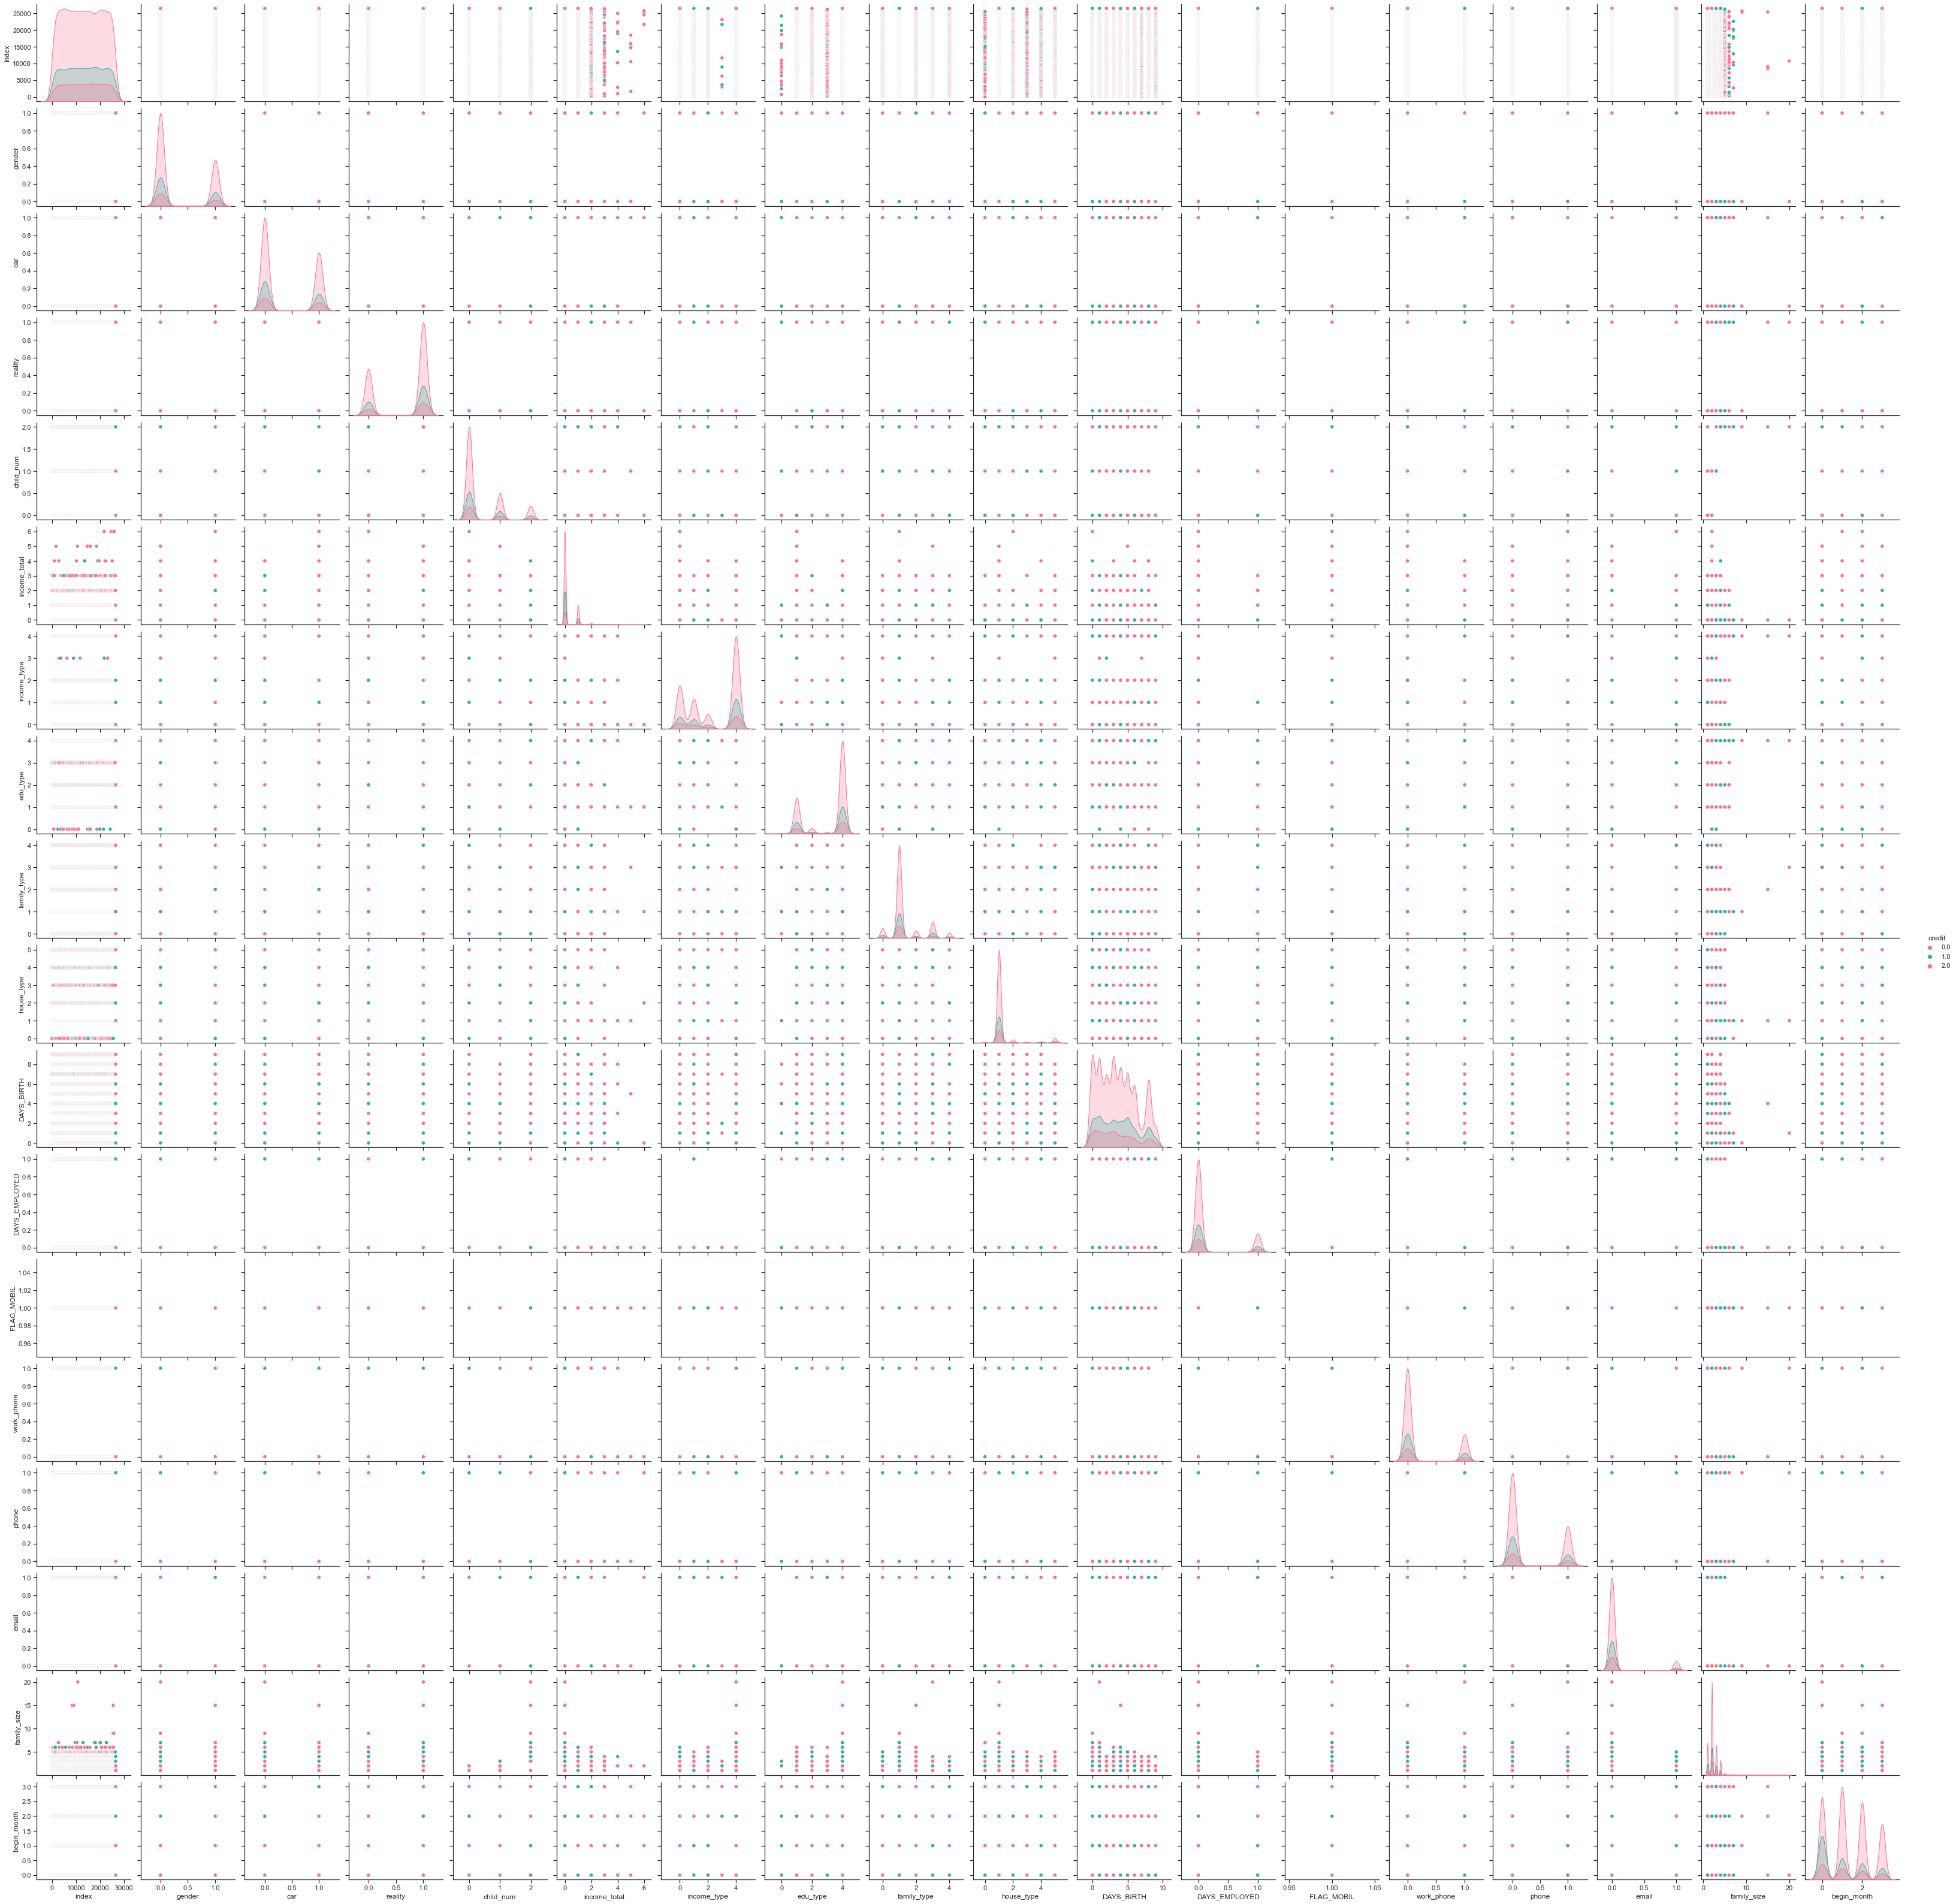

In [101]:
import seaborn as sns

sns.set(style = "ticks",color_codes = True)
g = sns.pairplot(data,hue = 'credit', palette = "husl")

In [291]:
from sklearn.model_selection import train_test_split

train_y = train['credit'].values


train_x = train_x.values

In [292]:
(X_train, X_test, y_train, y_test) = train_test_split(train_x, train_y, train_size=0.8, random_state=1)

In [293]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# 훈련 데이터와 테스트 데이터에 대해서 원-핫 인코딩
print(y_train[:5])
print(y_test[:5])

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [296]:
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

model=Sequential()
model.add(Dense(3, input_dim=35, activation='softmax'))
sgd=optimizers.SGD(lr=0.01)
# 학습률(learning rate, lr)은 0.01로 합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
# 옵티마이저는 경사하강법의 일종인 adam을 사용합니다.
# 손실 함수(Loss function)는 크로스 엔트로피 함수를 사용합니다.
history=model.fit(X_train,y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test))
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 200번 시도합니다.

Epoch 1/50
331/331 [==============================] - 1s 1ms/step - loss: 4746.4801 - accuracy: 0.1318 - val_loss: 745.3294 - val_accuracy: 0.2045
Epoch 2/50
331/331 [==============================] - 0s 728us/step - loss: 213.0062 - accuracy: 0.3893 - val_loss: 1.3059 - val_accuracy: 0.6330
Epoch 3/50
331/331 [==============================] - 0s 615us/step - loss: 1.2433 - accuracy: 0.5775 - val_loss: 1.8912 - val_accuracy: 0.6395
Epoch 4/50
331/331 [==============================] - 0s 677us/step - loss: 1.3363 - accuracy: 0.5606 - val_loss: 1.5860 - val_accuracy: 0.5871
Epoch 5/50
331/331 [==============================] - 0s 673us/step - loss: 1.9483 - accuracy: 0.5333 - val_loss: 1.0600 - val_accuracy: 0.5406
Epoch 6/50
331/331 [==============================] - 0s 647us/step - loss: 1.1229 - accuracy: 0.5838 - val_loss: 0.9024 - val_accuracy: 0.6385
Epoch 7/50
331/331 [==============================] - 0s 622us/step - loss: 1.4281 - accuracy: 0.5542 - val_loss: 1.2463 - val_accu

In [294]:
X_train.shape

(21165, 35)

In [295]:
y_train.shape

(21165, 3)

In [169]:
from sklearn.model_selection import KFold


import numpy as np 
import pandas as pd 
import os 

from scipy import stats 
from sklearn.model_selection import KFold 
import lightgbm as lgb 
import xgboost as xgb 
from catboost import CatBoostRegressor 

from sklearn import linear_model 
import datetime


In [170]:
folds = KFold(n_splits = 5, shuffle = True)

oof_preds = np.zeros(train.shape[0])

In [171]:
y_train = train_y
x_train = train_x

In [172]:
x_train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
0,0,0,0,0,0,0,0,1,1,2,0,0,1,0,0,0,2.0,0
1,1,0,0,1,1,0,0,4,0,1,1,0,1,0,0,1,3.0,0
2,2,1,1,1,0,1,4,1,1,1,2,0,1,0,1,0,2.0,1
3,3,0,0,1,0,0,0,4,1,1,3,0,1,0,1,0,2.0,2
4,4,0,1,1,0,0,2,1,1,1,3,0,1,0,0,0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,0,2,4,1,1,1,0,1,0,0,0,4.0,0
26453,26453,0,0,1,1,0,4,1,2,1,3,0,1,0,0,0,2.0,3
26454,26454,0,1,0,0,1,4,4,0,5,5,0,1,0,0,0,2.0,1
26455,26455,1,0,1,0,0,4,2,3,1,5,0,1,0,0,0,1.0,3


In [176]:
print("using catboost")

sub_preds_catboost = np.zeros(train.shape[0])

for n_fold, (trn_idx, val_idx) in enumerate(folds.split(train)) : 
    trn_x, trn_y = x_train.iloc[trn_idx], y_train[trn_idx] 
    val_x, val_y = x_train.iloc[val_idx], y_train[val_idx] 
    cb_model = CatBoostRegressor(iterations=1000, 
                                 
                                 learning_rate=0.1, 
                                 
                                 depth=4, l2_leaf_reg=20, 
                                 
                                 bootstrap_type='Bernoulli',
                                 
                                 subsample=0.6, eval_metric='RMSE', 
                                 
                                 metric_period=100, od_type='Iter', 
                                 
                                 od_wait=45, random_seed=17, 
                                 
                                 allow_writing_files=False)
    cb_model.fit(trn_x, 
                 trn_y, 
                 eval_set=(val_x, val_y), 
                 cat_features=[],
                 use_best_model=True,
                 verbose=True)

using catboost
0:	learn: 0.6998853	test: 0.7054247	best: 0.7054247 (0)	total: 1.98ms	remaining: 1.98s
100:	learn: 0.6893366	test: 0.6989302	best: 0.6989286 (96)	total: 149ms	remaining: 1.33s


200:	learn: 0.6843656	test: 0.6981276	best: 0.6980990 (179)	total: 294ms	remaining: 1.17s
Stopped by overfitting detector  (45 iterations wait)

bestTest = 0.6980989593
bestIteration = 179

Shrink model to first 180 iterations.
0:	learn: 0.7020308	test: 0.6968017	best: 0.6968017 (0)	total: 1.46ms	remaining: 1.46s
100:	learn: 0.6913087	test: 0.6908431	best: 0.6907828 (95)	total: 141ms	remaining: 1.26s


200:	learn: 0.6865950	test: 0.6898106	best: 0.6898099 (199)	total: 286ms	remaining: 1.14s
300:	learn: 0.6830089	test: 0.6895387	best: 0.6894804 (287)	total: 425ms	remaining: 987ms
400:	learn: 0.6794635	test: 0.6891942	best: 0.6890898 (392)	total: 566ms	remaining: 846ms
Stopped by overfitting detector  (45 iterations wait)

bestTest = 0.689017582
bestIteration = 426

Shrink model to first 427 iterations.
0:	learn: 0.6999248	test: 0.7053067	best: 0.7053067 (0)	total: 2.42ms	remaining: 2.42s
100:	learn: 0.6893383	test: 0.6971528	best: 0.6971528 (100)	total: 145ms	remaining: 1.29s


Stopped by overfitting detector  (45 iterations wait)

bestTest = 0.6966401122
bestIteration = 149

Shrink model to first 150 iterations.
0:	learn: 0.7034368	test: 0.6909150	best: 0.6909150 (0)	total: 1.48ms	remaining: 1.48s
100:	learn: 0.6923695	test: 0.6852300	best: 0.6852300 (100)	total: 146ms	remaining: 1.3s


200:	learn: 0.6876021	test: 0.6843564	best: 0.6843116 (198)	total: 292ms	remaining: 1.16s
300:	learn: 0.6834935	test: 0.6837285	best: 0.6836220 (287)	total: 437ms	remaining: 1.01s
400:	learn: 0.6801899	test: 0.6835711	best: 0.6835297 (390)	total: 596ms	remaining: 890ms
Stopped by overfitting detector  (45 iterations wait)

bestTest = 0.6835297104
bestIteration = 390

Shrink model to first 391 iterations.
0:	learn: 0.6995126	test: 0.7066064	best: 0.7066064 (0)	total: 1.49ms	remaining: 1.49s


100:	learn: 0.6886431	test: 0.6989065	best: 0.6988787 (96)	total: 146ms	remaining: 1.3s
200:	learn: 0.6835239	test: 0.6983272	best: 0.6981576 (180)	total: 300ms	remaining: 1.19s
Stopped by overfitting detector  (45 iterations wait)

bestTest = 0.6981576366
bestIteration = 180

Shrink model to first 181 iterations.


In [173]:
#이 코드는 교차검증을 이용한 catboost 모델 만들기
print("using catboost")

sub_preds_catboost = np.zeros(train.shape[0])

for n_fold, (trn_idx, val_idx) in enumerate(folds.split(train)) : 
    trn_x, trn_y = x_train.loc[trn_idx], y_train[trn_idx] 
    val_x, val_y = x_train.loc[val_idx], y_train[val_idx] 
    cb_model = CatBoostRegressor(iterations=1000, 
                                 
                                 learning_rate=0.1, 
                                 
                                 depth=4, l2_leaf_reg=20, 
                                 
                                 bootstrap_type='Bernoulli',
                                 
                                 subsample=0.6, eval_metric='RMSE', 
                                 
                                 metric_period=100, od_type='Iter', 
                                 
                                 od_wait=45, random_seed=17, 
                                 
                                 allow_writing_files=False)
    cb_model.fit(trn_x, 
                 trn_y, 
                 eval_set=(val_x, val_y), 
                 cat_features=[],
                 use_best_model=True,
                 verbose=True)
    oof_preds_catboost[val_idx] = cb_model.predict(val_x) 
    sub_preds_catboost += cb_model.predict(x_test) / folds.n_splits

using catboost
0:	learn: 0.7014698	test: 0.6991636	best: 0.6991636 (0)	total: 1.98ms	remaining: 1.98s
100:	learn: 0.6911393	test: 0.6923564	best: 0.6921777 (81)	total: 172ms	remaining: 1.53s


Stopped by overfitting detector  (45 iterations wait)

bestTest = 0.6921776724
bestIteration = 81

Shrink model to first 82 iterations.


NameError: name 'oof_preds_catboost' is not defined

In [269]:
sub_cat = pd.DataFrame() 

sub_cat['ID'] = test_1['ID'] 
sub_cat['target'] = np.exp(sub_preds_catboost)-1 

sub_cat.to_csv('sansander_catboost.csv', index = False)


NameError: name 'test_1' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [255]:
train_x = train.drop("credit",axis = 1)
train_y = train['credit']

In [256]:
clf = RandomForestClassifier()

In [257]:
clf.fit(train_x,train_y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').